# Лабораторная работа № 4. ТМО.

# Линейные модели, SVM и деревья решений.

## Цель лабораторной работы: 
изучение линейных моделей, SVM и деревьев решений.

## Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
- одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
- SVM;
- дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

### Импорт библиотек

In [1]:
import sys
sys.path
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from io import StringIO
from sklearn.model_selection import train_test_split

## Загрузка данных

Описание столбцов:
- world_rank - мировой рейтинг университета
- institution - название университета
- country - страна, в которой расположен университет
- national_rank - рейтинг университета в стране его нахождения
- quality_of_education - рейтинг качества образования
- quality_of_faculty - рейтинг качества профессорско-преподавательского состава
- publications - рейтинг публикаций
- infuence - рейтинг влияния
- citations - количество студентов в университете
- broad_impact - рейтинг за широкое влияние (предоставлен только за 2014 и 2015 гг. Остальное - пропуски)
- patents - рейтинг за патенты
- score - общий балл, используемый для определения мирового рейтинга
- year - год рейтинга (с 2012 по 2015 год)

#### Загрузим данные:

In [2]:
df = pd.read_csv('cwurData.csv')

### Основные характеристики датасета

In [3]:
# Выведем первые 5 строк из выбранного датасета.
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = df.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 2200
Всего колонок: 14


In [5]:
# Выведем список колонок с типами данных.
df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

### Проверка на пустые значения в датасете

In [6]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

world_rank - 0
institution - 0
country - 0
national_rank - 0
quality_of_education - 0
alumni_employment - 0
quality_of_faculty - 0
publications - 0
influence - 0
citations - 0
broad_impact - 200
patents - 0
score - 0
year - 0


In [7]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

В колонке broad_impact есть пропуски. Их надо заполнить.

In [9]:
percent = (200 / 2200) * 100
print('Процент пропусков в broad_impact: {}'.format(percent))

Процент пропусков в broad_impact: 9.090909090909092


##### ---- Настройка формата графиков ----

In [10]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4
pd.set_option("display.width", 70)

##### ----------------------------------------------------------

### Обработка пропусков данных

##### Очистка строк

In [11]:
# Удаление строк, содержащих пустые значения
df_no_null = df.dropna(axis=0, how='any')
(df.shape, df_no_null.shape)

((2200, 14), (2000, 14))

In [12]:
df_no_null.head(11)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [13]:
total_count = df_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


### Кодирование категориальных признаков

Преобразуем в числовые значения (label encoding)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
le = LabelEncoder()
    # "institution"
le.fit(df_no_null.institution.drop_duplicates()) 
df_no_null.institution = le.transform(df_no_null.institution)
    # "country"
le.fit(df_no_null["country"].drop_duplicates()) 
df_no_null["country"] = le.transform(df_no_null["country"])

C:\Users\79626\AppData\Local\Temp\ipykernel_5632\1139360109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null.institution = le.transform(df_no_null.institution)
C:\Users\79626\AppData\Local\Temp\ipykernel_5632\1139360109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null["country"] = le.transform(df_no_null["country"])


<AxesSubplot:>

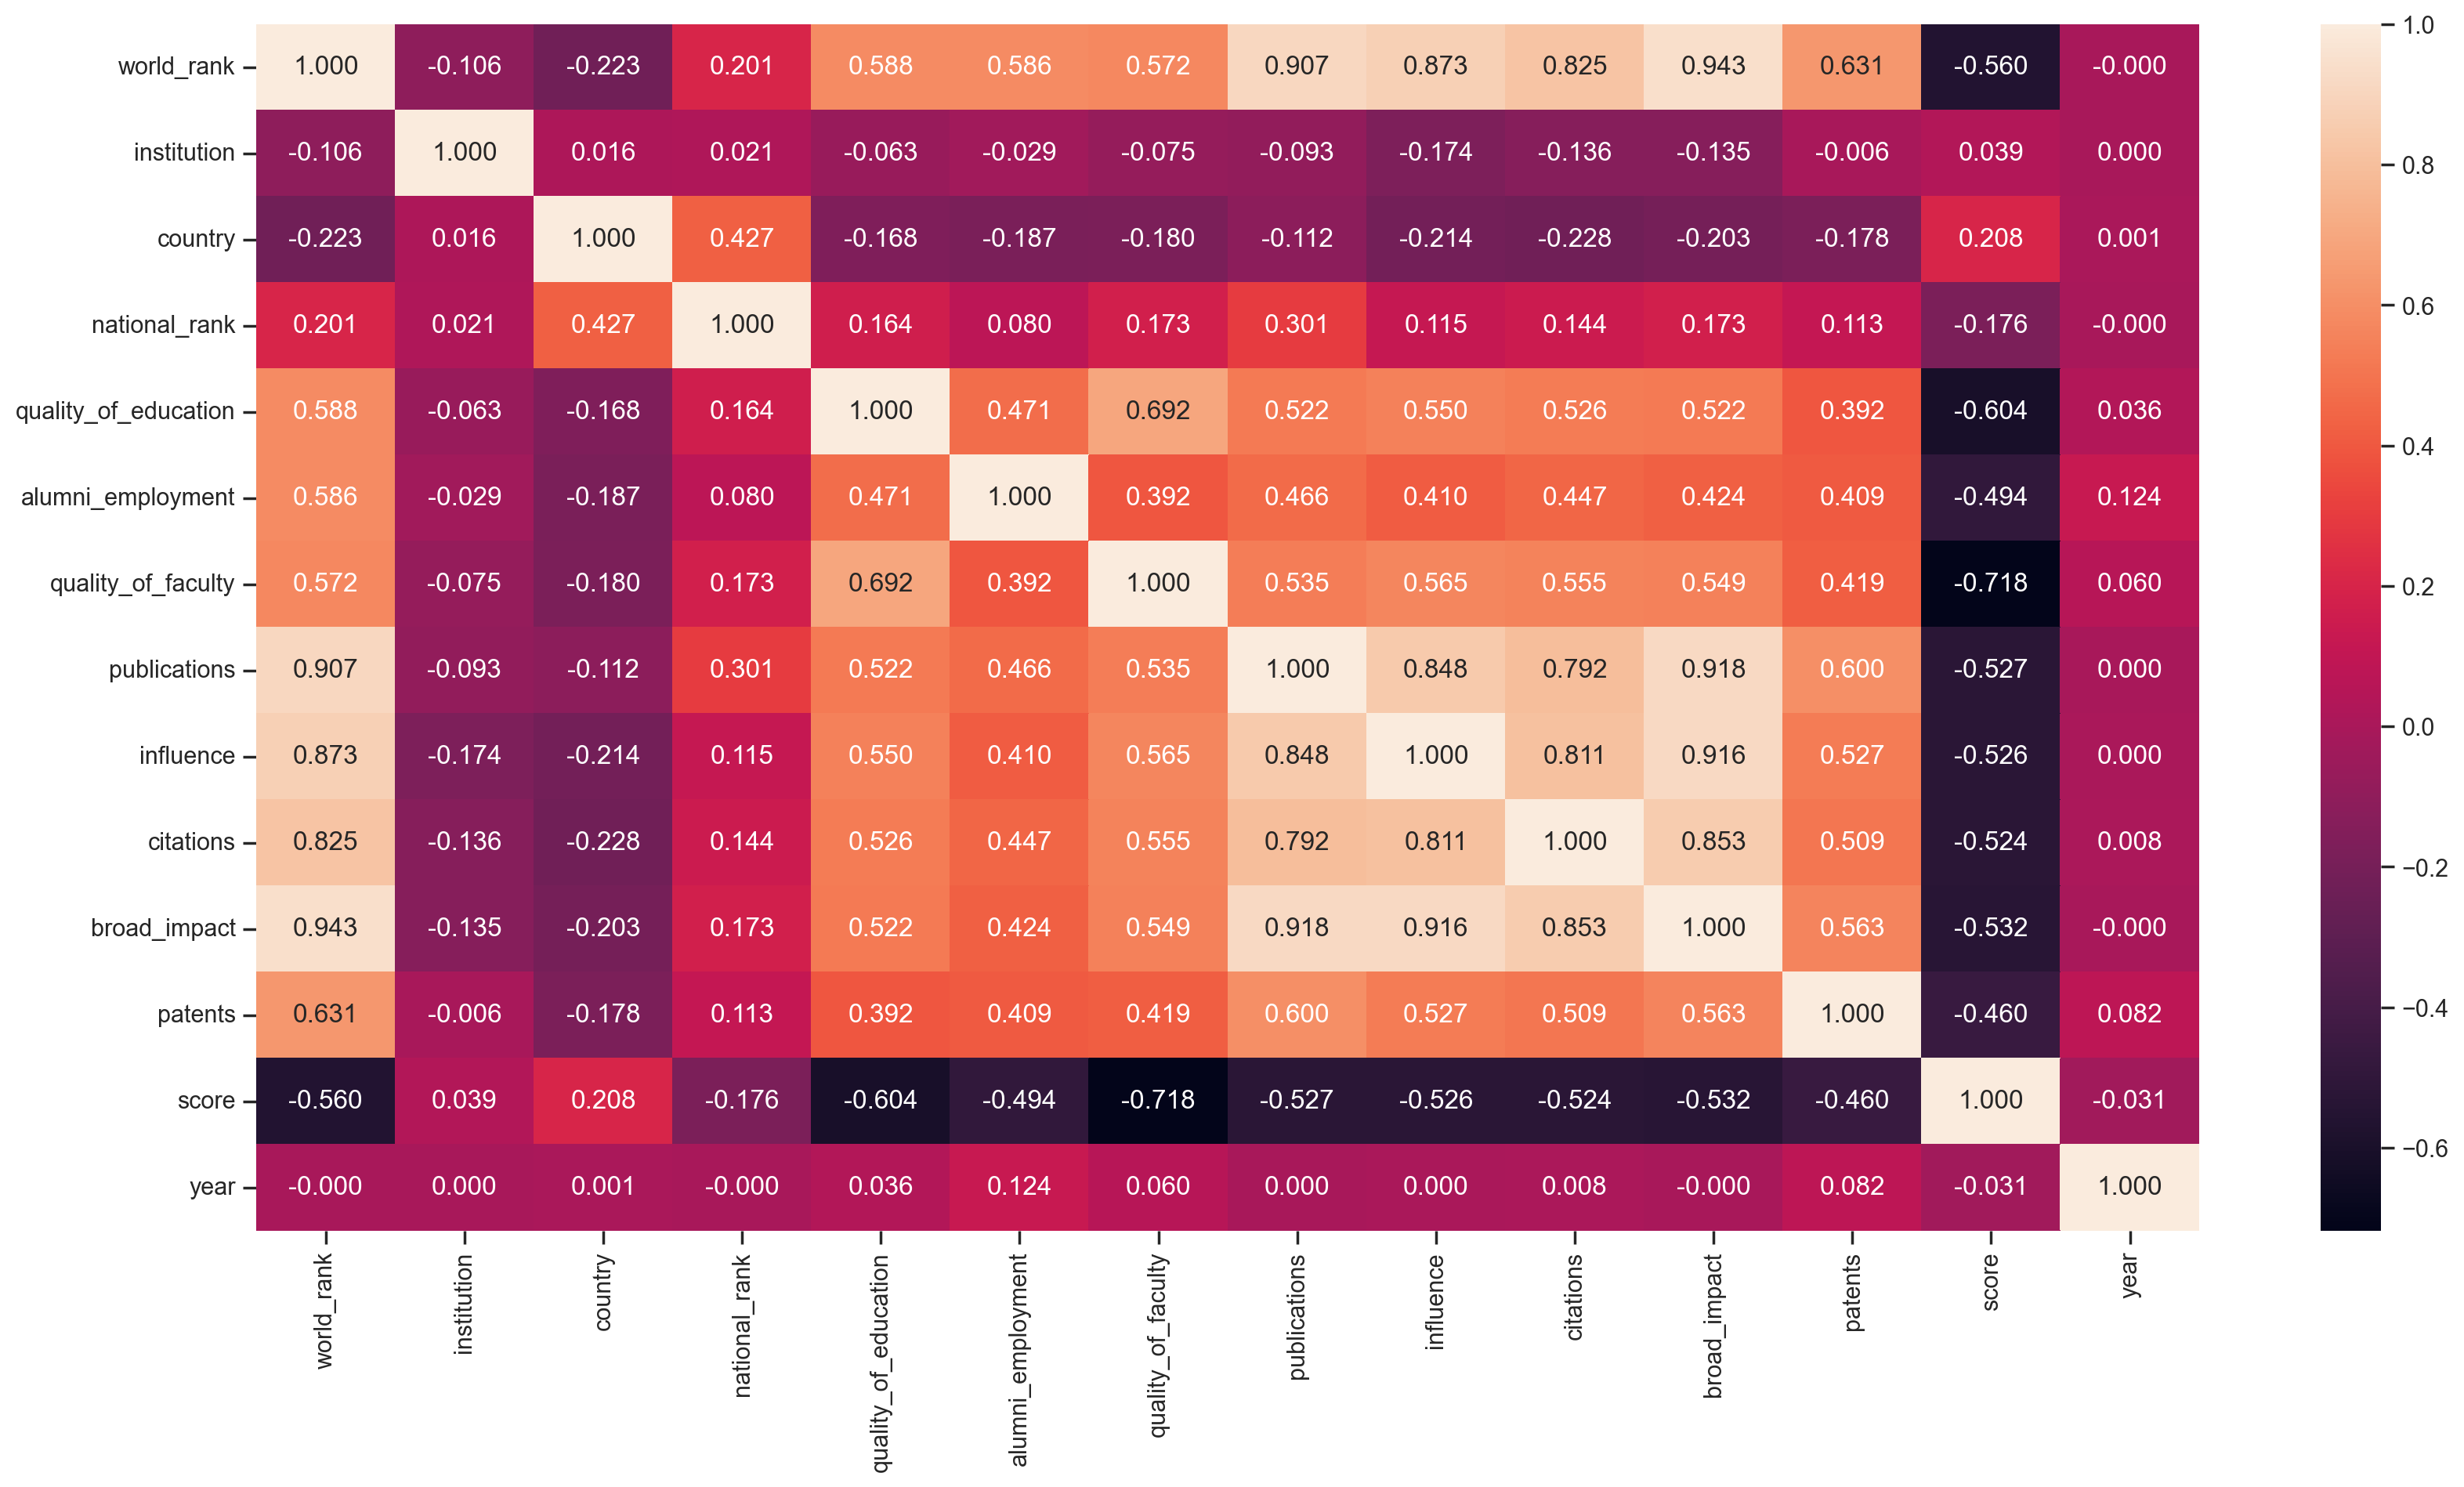

In [18]:
ig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_no_null.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

### Предсказание целевого признака

Предскажем значение целевого признака world_rank по broad_impact и publications, поскольку их значения кореляции ближе всего к 1

### Разбиение выборки на обучающую и тестовую

In [20]:
X = df_no_null[["broad_impact", "publications"]]
Y = df_no_null["world_rank"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

      broad_impact  publications
200           1.0             1
201           4.0             5
202           2.0            15
203          13.0            10
204          12.0            11 

Выходные данные:

 200    1
201    2
202    3
203    4
204    5
Name: world_rank, dtype: int64


Разделим выборку на обучающую и тестовую

In [21]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2023, test_size = 0.1)

Входные параметры обучающей выборки

In [22]:
X_train.head()

,broad_impact,publications
2169,946.0,999
2033,896.0,888
507,266.0,229
874,596.0,717
1377,251.0,148


Входные параметры тестовой выборки

In [23]:
X_test.head()

,broad_impact,publications
431,158.0,236
1960,741.0,791
991,783.0,689
604,326.0,452
1595,480.0,363


Выходные параметры обучающей выборки

In [24]:
Y_train.head()

2169    970
2033    834
507     308
874     675
1377    178
Name: world_rank, dtype: int64

Выходные параметры тестовой выборки

In [25]:
Y_test.head()

431     232
1960    761
991     792
604     405
1595    396
Name: world_rank, dtype: int64

### Построение линейной регрессии

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

In [27]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)
lr_y_pred = Lin_Reg.predict(X_test)

Возьмем тот параметр, чья корреляция ближе всего к единице, т.е. Company name

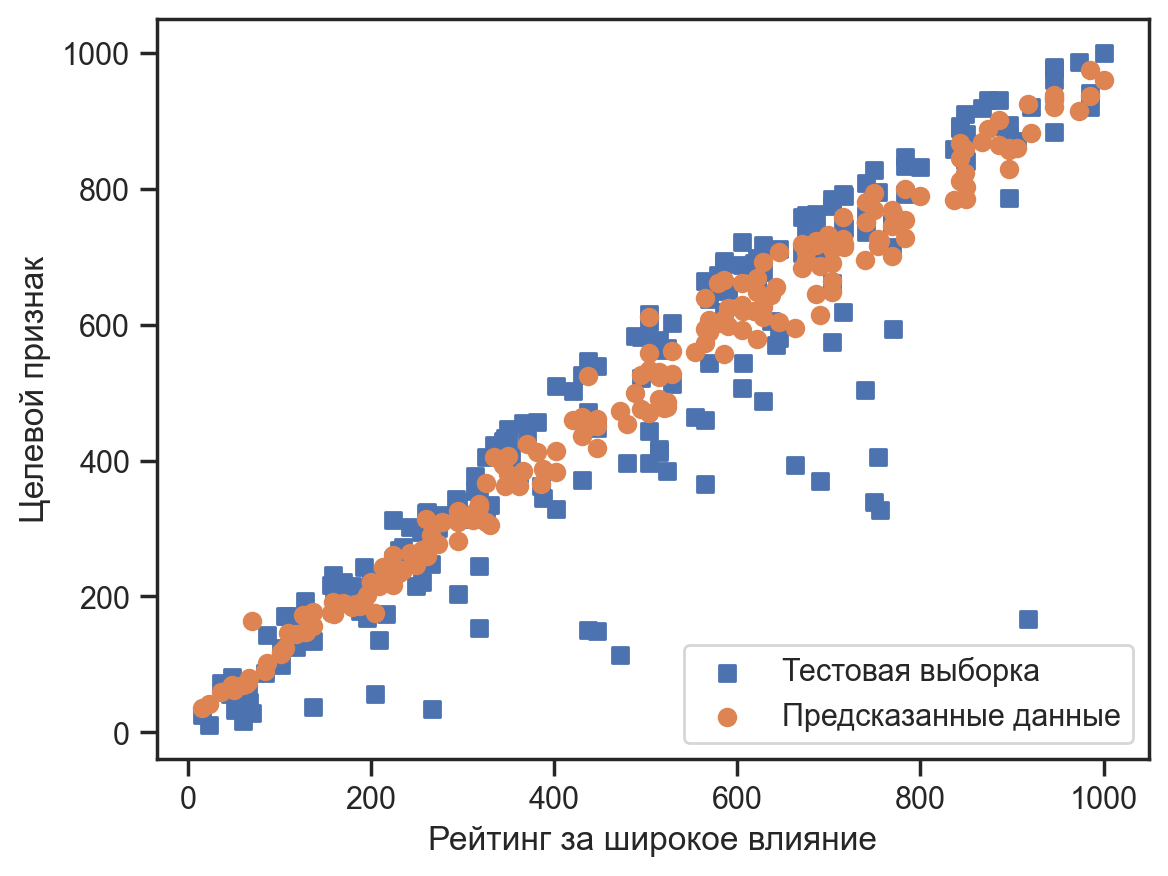

In [28]:
plt.scatter(X_test["broad_impact"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["broad_impact"], lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Рейтинг за широкое влияние')
plt.ylabel ('Целевой признак')
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

In [30]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 63.5376559993219
Средняя квадратичная ошибка: 10888.524678471002
Median absolute error: 44.56267619976197
Коэффициент детерминации: 0.8530000859769544


### SVM

In [31]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets import make_blobs

In [32]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [33]:
pred_y = svc.predict(X_test)

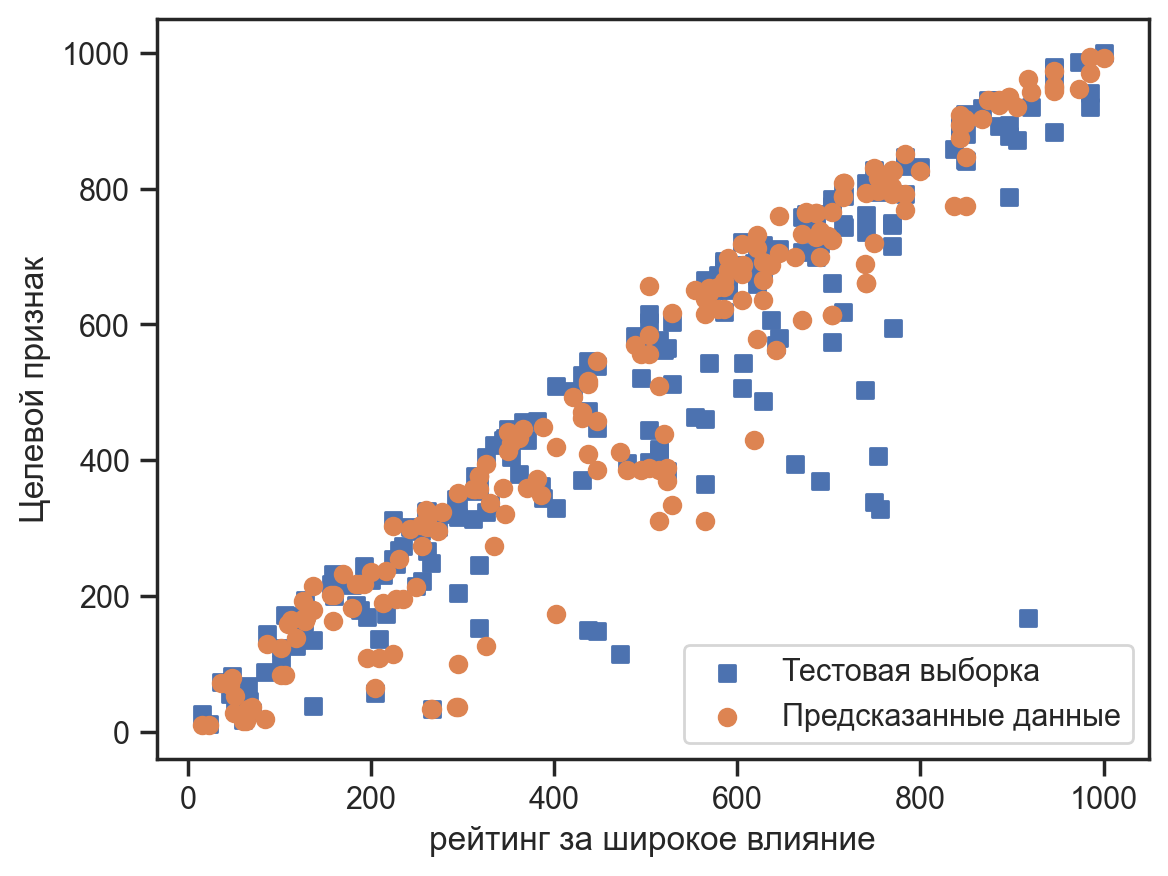

In [34]:
plt.scatter(X_test["broad_impact"], Y_test, marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["broad_impact"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('рейтинг за широкое влияние')
plt.ylabel ('Целевой признак')
plt.show()

In [35]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, pred_y))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, pred_y))
print('Median absolute error:',       median_absolute_error(Y_test, pred_y))
print('Коэффициент детерминации:',    r2_score(Y_test, pred_y))

Средняя абсолютная ошибка: 72.775
Средняя квадратичная ошибка: 15695.605
Median absolute error: 36.5
Коэффициент детерминации: 0.788102368900203


### Дерево

In [36]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re
from IPython.core.display import HTML
from sklearn.tree import export_text
import graphviz
from IPython.display import Image
import pydotplus

Обучим дерево на всех признаках

In [37]:
reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_test, Y_test)

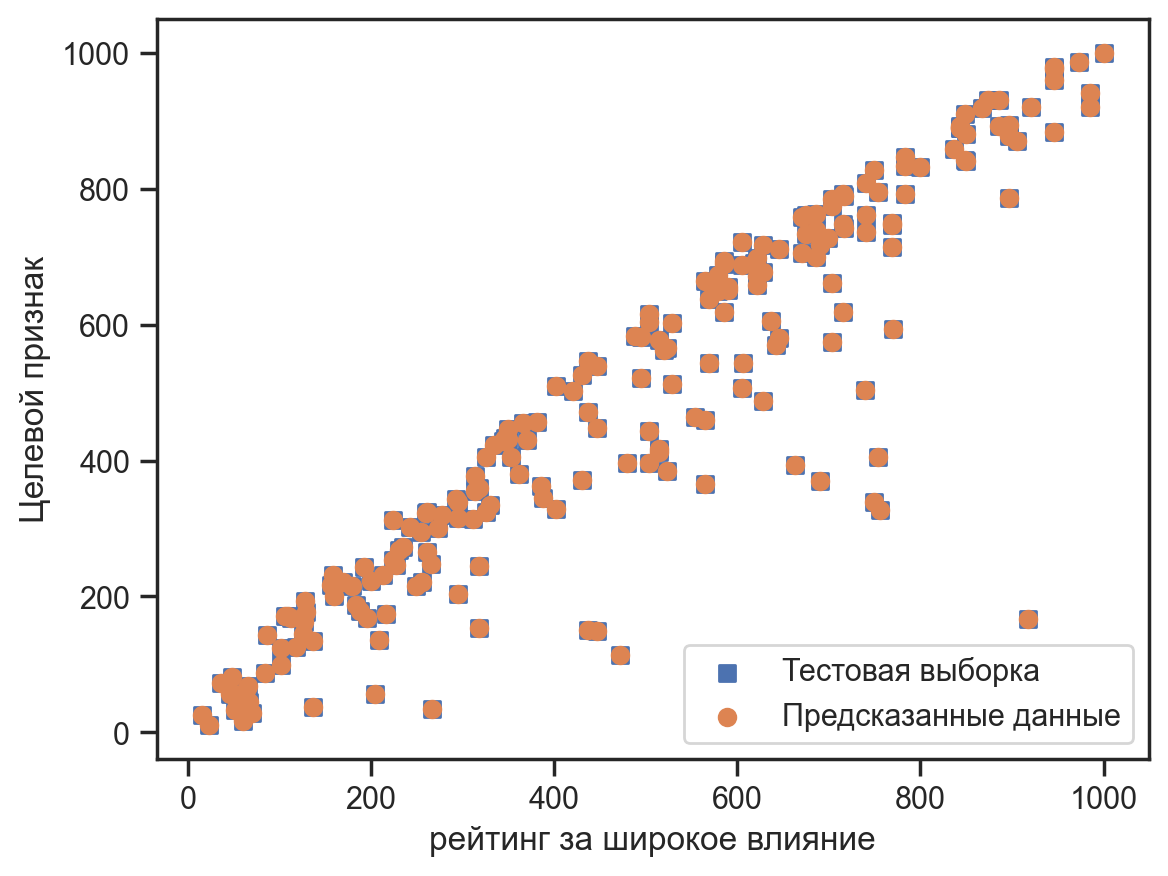

In [38]:
pred_y = reg.predict(X_test)
plt.scatter(X_test["broad_impact"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["broad_impact"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('рейтинг за широкое влияние')
plt.ylabel ('Целевой признак')
plt.show()

### Дерево в текстовом виде

In [39]:
tree_rules = export_text(reg, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

### Визуализация дерева

In [40]:
from PIL import Image

In [41]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [42]:
Image(get_png_tree(reg, X.columns), height='100%')

TypeError: 'module' object is not callable

### Важность признаков в дереве

In [43]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

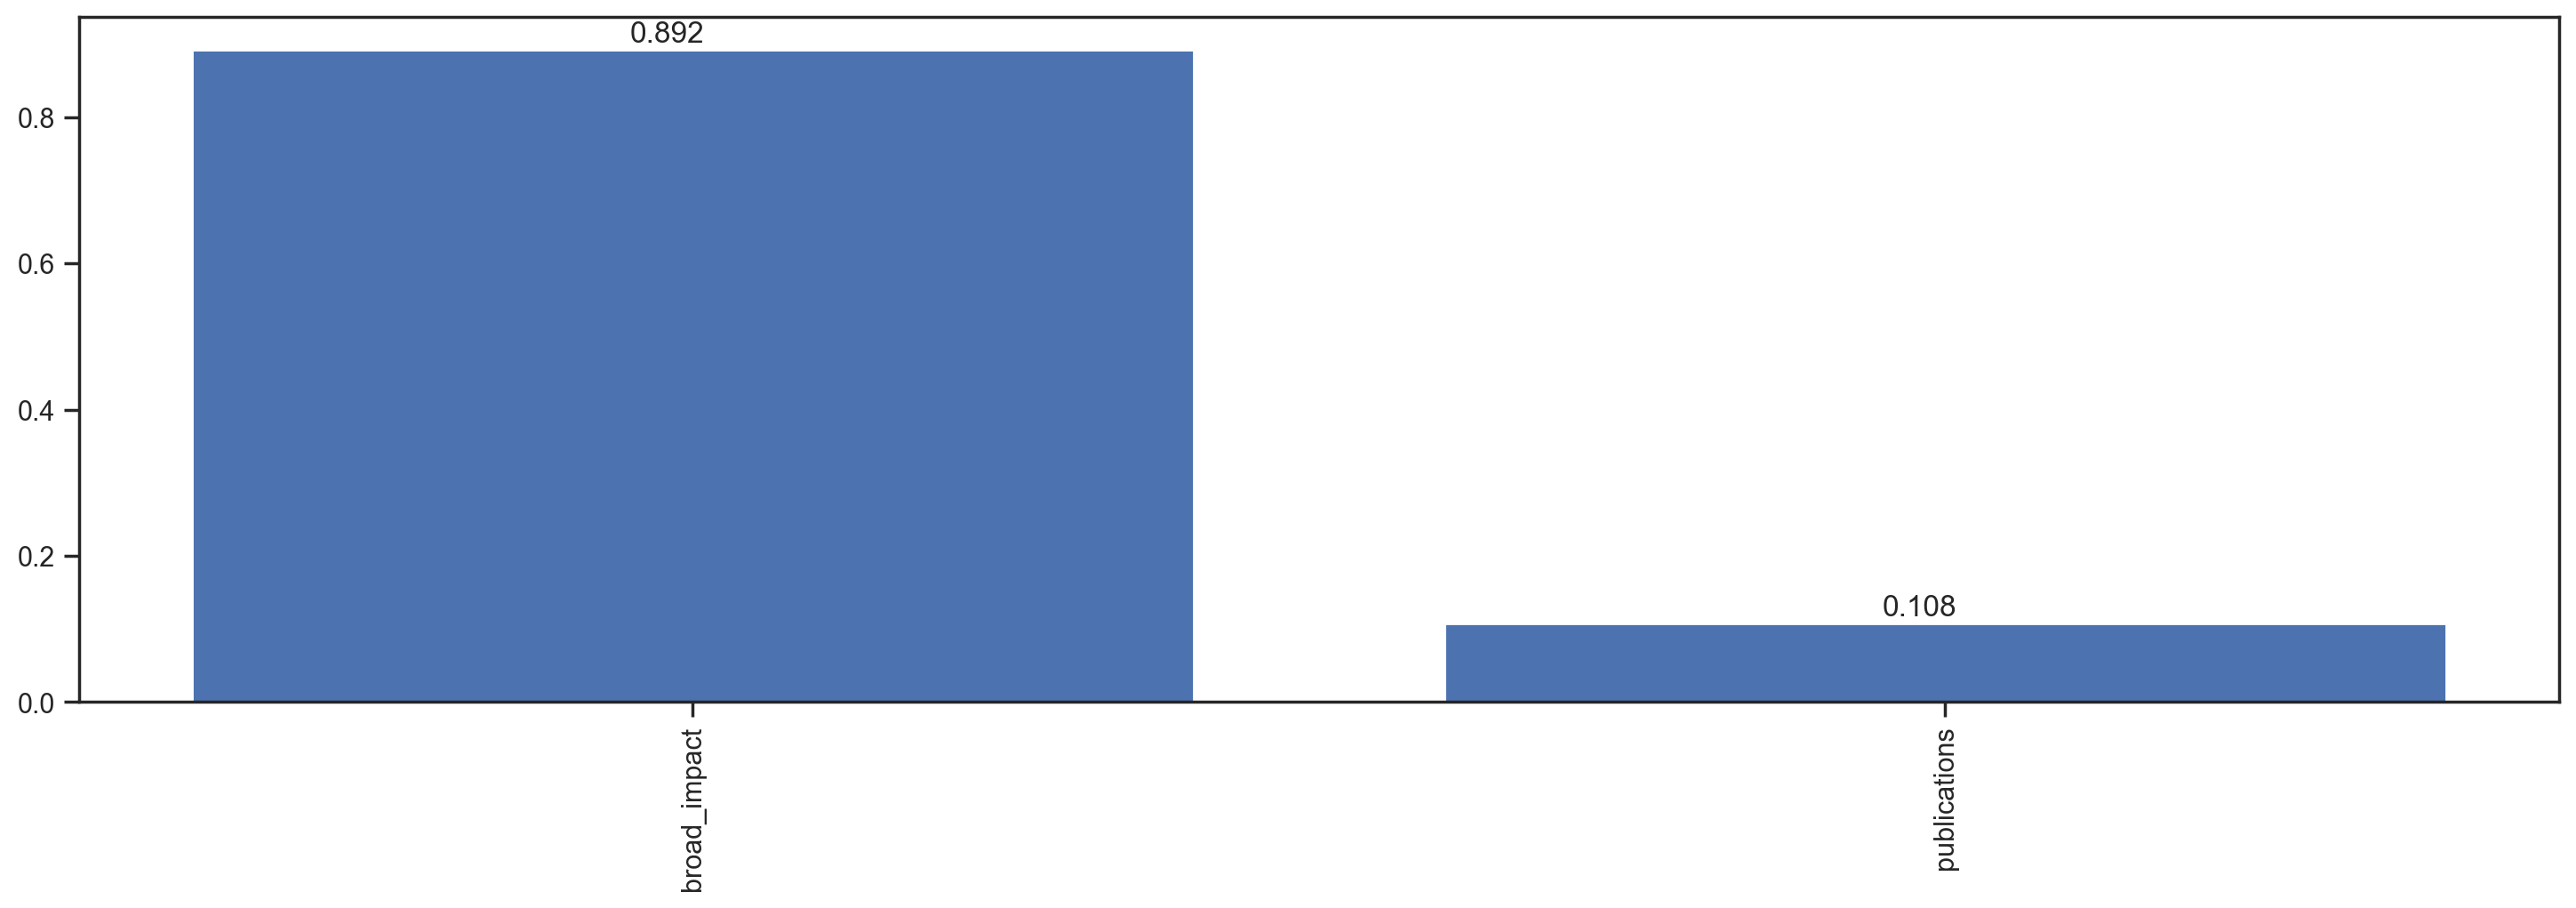

In [44]:
boston_tree_regr_fl, boston_tree_regr_fd = draw_feature_importances(reg, X)